In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
cd/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train

/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train


In [86]:
ls

 Apple___Black_rot/        'Corn_(maize)___Northern_Leaf_Blight'/
 Apple___healthy/           Peach___Bacterial_spot/
'Corn_(maize)___healthy'/   Peach___healthy/


In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [89]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [90]:
pwd

'/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train'

In [91]:
x_train=train_datagen.flow_from_directory(r"/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [92]:
x_test=test_datagen.flow_from_directory(r"/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [93]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [95]:
model=Sequential()

In [96]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [97]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [98]:
model.add(Flatten())

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61504)             0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.add(Dense(300,input_dim=4,activation='relu'))

In [101]:
model.add(Dense(150,activation='relu'))

In [102]:
model.add(Dense(6,activation='softmax'))

In [103]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
len(x_train)

225

In [105]:
len(x_test)

225

In [106]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


225/225 [==============================] - 102s 451ms/step - loss: 0.6051 - accuracy: 0.8053 - val_loss: 0.2829 - val_accuracy: 0.9008
Epoch 2/10
225/225 [==============================] - 100s 444ms/step - loss: 0.2416 - accuracy: 0.9186 - val_loss: 0.1743 - val_accuracy: 0.9346
Epoch 3/10
225/225 [==============================] - 98s 437ms/step - loss: 0.2015 - accuracy: 0.9264 - val_loss: 0.1069 - val_accuracy: 0.9627
Epoch 4/10
225/225 [==============================] - 100s 446ms/step - loss: 0.1366 - accuracy: 0.9558 - val_loss: 0.1409 - val_accuracy: 0.9504
Epoch 5/10
225/225 [==============================] - 101s 448ms/step - loss: 0.1313 - accuracy: 0.9551 - val_loss: 0.1769 - val_accuracy: 0.9370
Epoch 6/10
225/225 [==============================] - 99s 441ms/step - loss: 0.1142 - accuracy: 0.9584 - val_loss: 0.1185 - val_accuracy: 0.9586
Epoch 7/10
225/225 [==============================] - 100s 446ms/step - loss: 0.1044 - accuracy: 0.9634 - val_loss: 0.0510 - val_accuracy

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61504)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               18451500  
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 6)                 906       
                                                      

In [108]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [109]:
ls

 Apple___Black_rot/        'Corn_(maize)___Northern_Leaf_Blight'/
 Apple___healthy/           Peach___Bacterial_spot/
'Corn_(maize)___healthy'/   Peach___healthy/


In [115]:
model.save('fruit.h5')

OSError: ignored

In [113]:
ls

 Apple___Black_rot/        'Corn_(maize)___Northern_Leaf_Blight'/
 Apple___healthy/           Peach___Bacterial_spot/
'Corn_(maize)___healthy'/   Peach___healthy/


In [114]:
model=load_model('fruits.h5')

OSError: ignored

In [117]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/02eee796-1a1e-4d63-8247-a6aac6bfb272___RS_NLB 3546.JPG")

In [118]:
x=image.img_to_array(img)

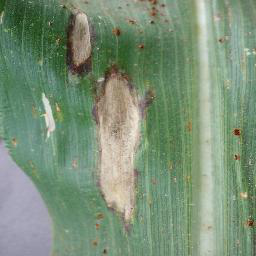

In [119]:
img

In [120]:
x

array([[[ 39.,  75.,  27.],
        [ 28.,  61.,  16.],
        [ 43.,  74.,  32.],
        ...,
        [104., 120.,  94.],
        [100., 116.,  89.],
        [ 99., 115.,  88.]],

       [[ 38.,  74.,  26.],
        [ 28.,  61.,  16.],
        [ 38.,  71.,  28.],
        ...,
        [110., 126., 100.],
        [106., 122.,  95.],
        [106., 122.,  95.]],

       [[ 39.,  75.,  27.],
        [ 30.,  66.,  20.],
        [ 37.,  70.,  27.],
        ...,
        [113., 129., 103.],
        [109., 125.,  98.],
        [107., 123.,  96.]],

       ...,

       [[142., 141., 159.],
        [143., 142., 160.],
        [145., 144., 162.],
        ...,
        [ 97., 110.,  90.],
        [ 71.,  82.,  65.],
        [ 89.,  98.,  81.]],

       [[144., 143., 161.],
        [144., 143., 161.],
        [145., 144., 162.],
        ...,
        [ 88., 101.,  81.],
        [ 66.,  77.,  60.],
        [ 89.,  98.,  81.]],

       [[146., 145., 163.],
        [146., 145., 163.],
        [145., 1

In [121]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/0ad77173-546c-4957-be8e-344a8cd492c3___RS_NLB 4118.JPG",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Corn_(maize)___Northern_Leaf_Blight','Apple___healthy','Peach___Bacterial_spot','Corn_(maize)___healthy','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 121ms/step


'Peach___Bacterial_spot'